In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# when using google colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### Loading Dataset

In [4]:
dataset_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
print(dataset_train.shape)
dataset_train.head()

(2035, 8)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

#### Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

#### Creating Data with Timesteps

In [9]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape

(1975, 60, 1)

#### Building LSTM

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [12]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
62/62 [==============================] - 13s 110ms/step - loss: 0.0103
Epoch 2/100
62/62 [==============================] - 7s 106ms/step - loss: 0.0029
Epoch 3/100
62/62 [==============================] - 7s 112ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 7s 107ms/step - loss: 0.0032
Epoch 5/100
62/62 [==============================] - 7s 106ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 6s 104ms/step - loss: 0.0025
Epoch 7/100
62/62 [==============================] - 7s 109ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 7s 112ms/step - loss: 0.0020
Epoch 9/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 7s 108ms/step - loss: 0.0017
Epoch 11/100
62/62 [==============================] - 7s 106ms/step - loss: 0.0021
Epoch 12/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0021
Epoch 13/100

#### Predicting Future Stock using the Test Set

In [14]:
dataset_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60 : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### Plotting the Results

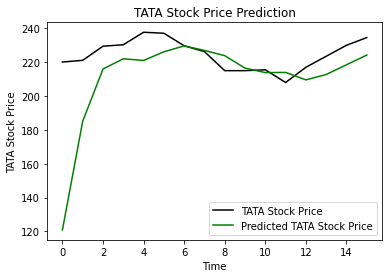

In [17]:
plt.plot(real_stock_price, color='black', label='TATA Stock Price')
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()